In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
import arch


In [2]:
data = pd.read_csv('../Datasets/YPFD.2000.2021.csv', index_col=0, usecols=[1, 2], parse_dates=True)
data = data.loc[data.ultimoPrecio>0]
data.head()

,ultimoPrecio
fechaHora,
2021-06-29 17:00:01.710,783.15
2021-06-28 17:00:03.613,807.00
2021-06-25 17:00:02.397,831.65
2021-06-24 17:00:03.497,871.40
2021-06-23 17:00:03.290,857.65


<AxesSubplot:xlabel='fechaHora'>

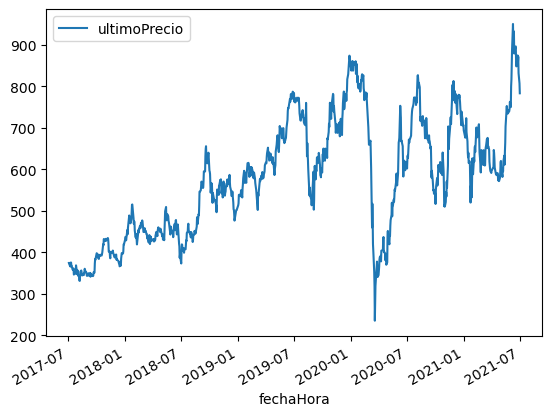

In [3]:
data.plot()

Text(0.5, 1.0, 'Rendimiento cuadrado')

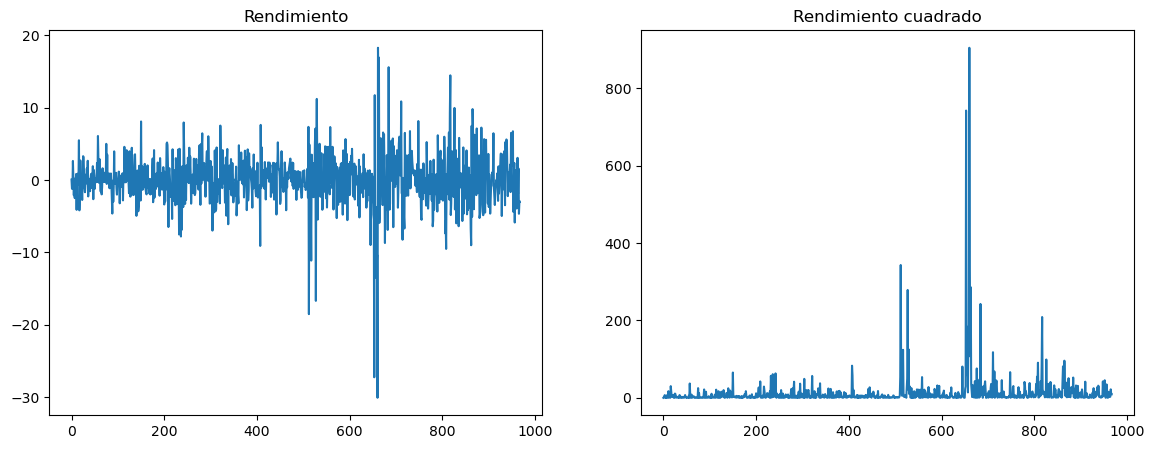

In [4]:
precio = data.ultimoPrecio.values[::-1]
r_t = (np.log(precio[1:]) - np.log(precio[:-1]))*100
fig, ax = plt.subplots(1,2, figsize = (14,5))
ax[0].plot(r_t)
ax[0].set_title('Rendimiento')
ax[1].plot(r_t**2)
ax[1].set_title('Rendimiento cuadrado')


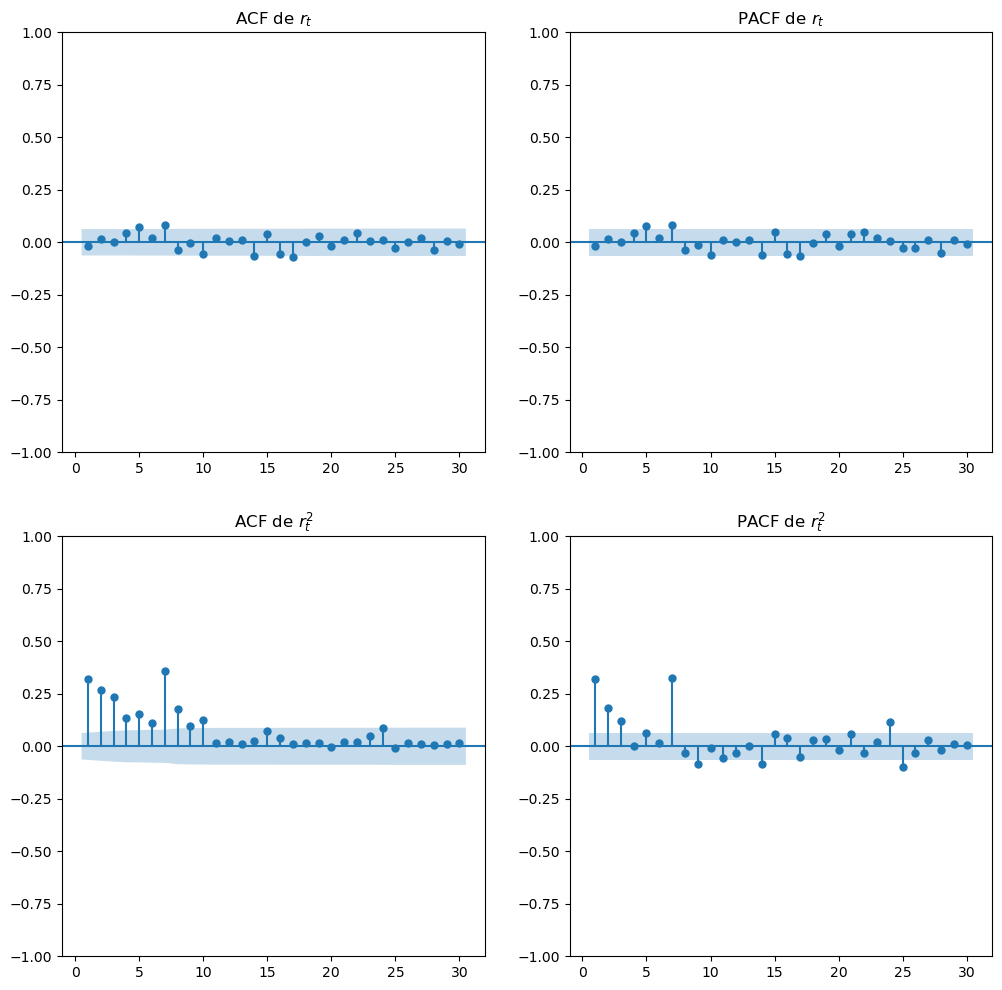

In [5]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
plot_acf(r_t, zero=False, title='ACF de $r_t$', ax=ax[0,0])
plot_pacf(r_t, zero=False, title='PACF de $r_t$', method='ywm', ax=ax[0,1])
plot_acf(r_t ** 2, zero=False, title='ACF de $r_t^2$', ax=ax[1,0])
plot_pacf(r_t ** 2, zero=False, title='PACF de $r_t^2$', method='ywm', ax=ax[1,1]);

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4026257650.9977727
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1698167.932540873
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2635.6605477014737
Iteration:      4,   Func. Count:     38,   Neg. LLF: 2454.851426437329
Iteration:      5,   Func. Count:     47,   Neg. LLF: 2465.1737898197707
Iteration:      6,   Func. Count:     56,   Neg. LLF: 2463.735264044732
Iteration:      7,   Func. Count:     65,   Neg. LLF: 2431.200529803379
Iteration:      8,   Func. Count:     74,   Neg. LLF: 2440.041360363049
Iteration:      9,   Func. Count:     83,   Neg. LLF: 2430.350751686031
Iteration:     10,   Func. Count:     91,   Neg. LLF: 2434.511215662419
Iteration:     11,   Func. Count:    101,   Neg. LLF: 2430.472934856977
Iteration:     12,   Func. Count:    110,   Neg. LLF: 2430.2223076250666
Iteration:     13,   Func. Count:    118,   Neg. LLF: 2430.2221143222523
Iteration:     14,   Func. Count:    126,   Neg. LLF: 2430.

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2430.22
Distribution:                  Normal   AIC:                           4874.44
Method:            Maximum Likelihood   BIC:                           4908.50
                                        No. Observations:                  958
Date:                Thu, Apr 13 2023   Df Residuals:                      957
Time:                        21:35:14   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.152

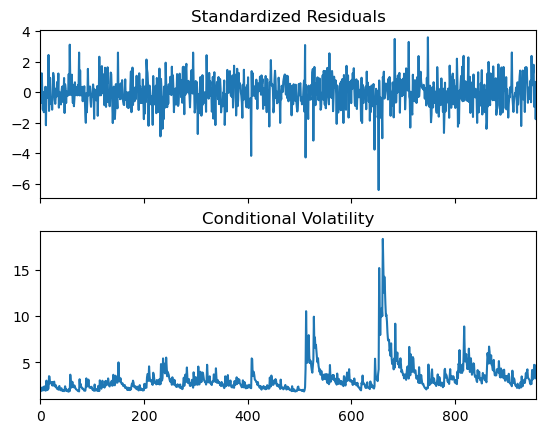

In [13]:
# Mirando las PACF de r^2 podemos sugerir que r^2 sigue un modelo ARMA(2,3), con lo cual la varianza
# condicional va a seguir un modelo GARCH(2,3)
garch = arch.arch_model(r_t[:-10], vol='garch', p=1, q=4, o=0, power=2)
garch_fitted = garch.fit()
garch_fitted.plot();
garch_fitted.summary

mu          1.526669e-01
omega       9.283949e-01
alpha[1]    2.937134e-01
beta[1]     3.287518e-01
beta[2]     1.532661e-17
beta[3]     1.525482e-01
beta[4]     1.663467e-01
Name: params, dtype: float64
mu          0.099151
omega       0.036960
alpha[1]    0.005667
beta[1]     0.038452
beta[2]     1.000000
beta[3]     0.139655
beta[4]     0.131887
Name: pvalues, dtype: float64
bic:  4908.498161627706


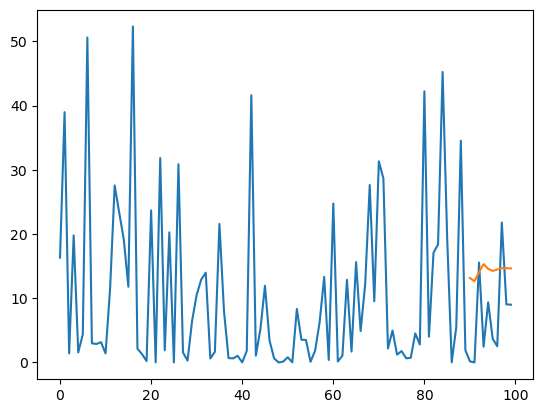

In [14]:
print(garch_fitted.params)
print(garch_fitted.pvalues)
print('bic: ', garch_fitted.bic)
forecast = garch_fitted.forecast(horizon=10, reindex=False)
resid = garch_fitted.resid
plt.plot(r_t[-100:]**2)
plt.plot(np.arange(90,100), forecast.variance.values.T)